## Лабораторная работа 3: Word Embeddings

Эта лабораторная работа посвящена Word Embeddings и различными развесёлыми манипуляциями с ними. Мы будем преобразовывать слова в плотные вектора с помощью двух алгоритмов Word2Vec: cbow и skipgram. Воспользуемся готовым решением, а именно библиотекой gensim. Полную документацию библиотеки можно почитать здесь: https://radimrehurek.com/gensim/apiref.html.

Но для начала подготовим данные. В gensim есть несколько встроенных датасетов, один из них -- text8. Этот датасет содержит выдержки из англоязычной википедии примерно на 32мб. Это немного, но чтобы поиграться сойдёт.

Давайте загрузим этот датасет. Он представляет из себя список списков слов.

In [3]:
import gensim.downloader as api

dataset = api.load("text8") 
data = [d for d in dataset]
data[50][:10]

['many',
 'exist',
 'these',
 'choices',
 'give',
 'us',
 'alternative',
 'forms',
 'of',
 'geometry']

Теперь давайте обучим модель w2v, использующую алгоритм cbow. Для этого воспользуемся классом Word2Vec из библиотеки gensim.

In [4]:
from gensim.models import Word2Vec
bow_model = Word2Vec(data,               # датасет
                     window=10,          # ширина контекстного окна
                     size=32,            # размерность векторов-эмбеддингов
                     sg=0,               # флаг, определяющий пользуемый алгоритм; 0 -- cbow, 1 -- skipgram
                     min_count=2).wv     # минимальное количество вхождений слова в датасет, необходимое для попадания в словарь

После того, как модель обучилась, мы можем всячески манипулировать полученными векторами. Например векторное представление слоа можно получить так:

In [4]:
bow_model['punk']

array([ 1.0404172 , -1.0104669 ,  3.8045652 , -2.6219752 , -1.7521901 ,
        1.2126812 , -0.0086145 , -4.3643117 ,  1.2851152 ,  1.3850315 ,
        1.3276641 , -1.0839678 , -0.77515596, -1.054928  , -1.4594959 ,
       -0.0223745 , -2.7395859 ,  1.4896156 ,  1.0535349 , -0.21102735,
       -0.39593068, -2.958638  , -0.31482807, -2.326453  , -3.209251  ,
       -0.81518906,  2.9370782 , -3.2521858 , -1.5298753 ,  0.9132692 ,
        3.6042428 , -4.7885704 ], dtype=float32)

...а еще можно получить список наиболее похожих слов...

In [5]:
bow_model.most_similar('anxiety')

[('psychosis', 0.9226536750793457),
 ('disorder', 0.9201958179473877),
 ('chronic', 0.9096776843070984),
 ('psychomotor', 0.9053877592086792),
 ('dysfunction', 0.9053524136543274),
 ('neurological', 0.902328610420227),
 ('schizophrenia', 0.8989721536636353),
 ('trauma', 0.8984450101852417),
 ('disorders', 0.8932541608810425),
 ('symptoms', 0.8886168003082275)]

...а еще эти вектора можно складывать и вычитать друг из друга (см. лекцию). Метод $\textit{most_similar}$ принимает два списка слов: positive (которые он складывает) и negative (которые вычитает). Это позволяет получить некоторую аналогию переноса знаний. Самый известный пример: при сложении векторов 'king' и 'woman' и вычитании вектора 'man' должно получиться нечто, близкое к вектору 'queen'. По смыслу это можно интерпретировать так: "как король, только женщина, а не мужчина". 

Давайте узнаем, кого наша модель считает русским Мао Дзе Дуном.

In [6]:
bow_model.most_similar(positive=['mao', 'russia'], negative=['china'])

[('stalin', 0.8722563982009888),
 ('mussolini', 0.8419444561004639),
 ('nikita', 0.8408349752426147),
 ('lenin', 0.8324171304702759),
 ('mikhail', 0.8187313079833984),
 ('gorbachev', 0.8001518845558167),
 ('beria', 0.8000801205635071),
 ('regime', 0.798416018486023),
 ('allende', 0.7965400815010071),
 ('castro', 0.7903324365615845)]

$\textbf{Задание.}$ По аналогии постройте и обучите Word2Vec модель, использующую алгоритм skipgram. Изучив особенности алгоритма определите как именно нужно изменить параметры модели по сравнению с алгоритмом cbow (что увеличить, что уменьшить). Размерность векторов-эмбеддингов должна быть равна 32.

In [5]:
sg_model = Word2Vec(data,               # датасет
                    window=20,          # ширина контекстного окна
                    size=32,            # размерность векторов-эмбеддингов
                    sg=1,               # флаг, определяющий пользуемый алгоритм; 0 -- cbow, 1 -- skipgram
                    min_count=2).wv     # минимальное количество вхождений слова в датасет, необходимое для попадания в словарь

$\textbf{Задание.}$ Придумайте свой пример на сложение и вычитание векторов.

$\textit{NB.}$ Как уже было отмечено, text8 является сравнительно небольшим датасетом, а размерность 32 является весьма скромной для векторов-эмбеддингов (стандартным значением является 300). Оба этих факта отрицательно влияют на качество эмбеддингов. Поэтому если результат вычисления не соответствует вашим ожиданием, то это может быть связано не только с плохой настройкой вашей модели, но и с низкой встречаемостью выбранных вами слов. Попробуйте разные примеры на сложение и поэкспереминтируйте с настройками параметров модели.


In [6]:
sg_model.most_similar(positive=['snow', 'autumn'], negative=['winter'])

[('hot', 0.8143668174743652),
 ('chilly', 0.8123666048049927),
 ('sunny', 0.8023033142089844),
 ('wet', 0.7981528043746948),
 ('rainy', 0.7976946830749512),
 ('rain', 0.7976014614105225),
 ('cool', 0.7897411584854126),
 ('dry', 0.7879881262779236),
 ('afternoon', 0.7745259404182434),
 ('warm', 0.7723628282546997)]

Давайте визуализируем построенные вашей моделью эмбеддинги. Будем передавать значения компонент как цвета.

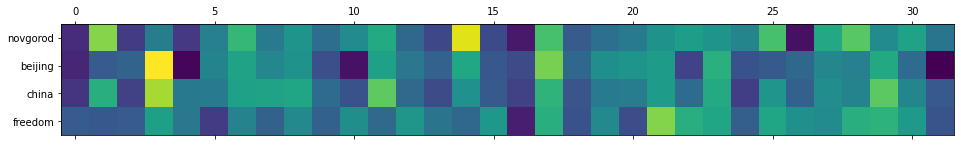

In [7]:
import matplotlib.pyplot as plt
import numpy as np


words_to_show=['novgorod', 'beijing', 'china', 'freedom']

nrows = len(words_to_show)
ncols = 32

image = np.zeros([nrows, ncols]) 
for i in range(nrows):
    word = words_to_show[i]
    image[i]=sg_model[word]
    
plt.matshow(image) 
plt.yticks(range(nrows), words_to_show) 
plt.show() 

$\textbf{Задание.}$ Порефлексируйте над полученной выше картинкой. Подумайте над тем, какие пары векторов должны быть больше визуально похожи друг на друга, а какие меньше, и соответствует ли результат действительности. 

$\textbf{Задание.}$ Реализуйте функцию скалярного произведения векторов и с помощью неё оцените, какая пара векторов похожа друг на друга сильнее -- novgorod и beijing или china и freedom?

Наверное логично, что Новгород и Пекин должны быть довольно близки, потому что это города. Так же Пекин и Китай тоже, логично почему. Но свобода и Китай логично было бы видеть разными, однако, в контексте использования слова свобода вместе со словом Китай, это может происходить довольно часто.

In [8]:
def compare_lengths(v1, v2):
    if len(v1) != len(v2):
        raise TypeError('Vectors have different lengths')

def multiply(v1, v2):
    compare_lengths(v1, v2)

    return sum([v1_elem * v2_elem for v1_elem,
                v2_elem in zip(v1, v2)])

def similarity(v1, v2):
    compare_lengths(v1, v2)

    return multiply(v1, v2)/( np.sqrt(multiply(v1, v1)) * np.sqrt(multiply(v2, v2)) )

In [9]:
similarity(sg_model['novgorod'], sg_model['beijing'])

0.4035456284536884

In [10]:
similarity(sg_model['china'], sg_model['freedom'])

0.4470647311908552

#### Проекция на плоскость: PCA

32-мерные вектора -- это, конечно, здорово, но картинка выше не слишком уж информативна. Было бы очень интересно посмотреть на эти вектора в пространстве и оценить как они группируются в кластеры. Но мы, люди, привыкли смотреть на 2-х и 3-х мерные вектора (ну или точки), в то время как наши эмбеддинги состоят из 32-х размерностей... Хорошая новость! Существуют алгоритмы понижения размерности.

Самым простым из них является алгоритм PCA (Principal Component Analysis -- Метод Главных Компонент).

В геометрическом смысле, PCA пытается найти такие оси, вдоль которых происходит наибольшая часть разброса значений. The "natural" axes, if you wish.

<img src="https://github.com/yandexdataschool/Practical_RL/raw/master/yet_another_week/_resource/pca_fish.png" style="width:30%">

В алгебраическом смысле, PCA пытается разложить матрицу $X$, содержащую вектора, на две матрицы меньшего размера: $W$ и $\hat W$ так, чтобы минимизировать среднее квадратичное отклонение:

$$\|(X W) \hat{W} - X\|^2_2 \to_{W, \hat{W}} \min$$
- $X \in \mathbb{R}^{n \times m}$ - матрица объектов;
- $W \in \mathbb{R}^{m \times d}$ - матрица прямого преобразования;
- $\hat{W} \in \mathbb{R}^{d \times m}$ - матрица обратного преобразования;
- $n$ -- число объектов, $m$ -- исходная размерность $d$ -- итоговая размерность;



Давайте выберем 12 слов, с помощью вашей модели получим эмбеддинги и попытаемся визуализировать их на плоскости. Пусть 4 слова соответствуют условной теме 'мировые лидеры', ещё 4 -- теме 'растительность', а оставшиеся 4 -- теме 'программирование'.

In [13]:
words = ['putin', 'trump', 'berlusconi', 'merkel', 'flower', 'tree', 'leaf', 'pine', 'programming', 'code', 'python', 'java']
word_vectors = np.array([sg_model[word] for word in words])

$\textbf{Задание.}$ Примените алгоритм PCA из библиотеки sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA) к эмбеддинам, чтобы получить из них двумерные вектора. Полезным также будет применить нормализацию к полученным векторам.

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

word_vectors_pca = pca.fit(word_vectors.T).components_

Что же, если вы всё сделали правильно, то теперь полученные вектора можно визуализировать!

In [11]:
import bokeh.models as bm, bokeh.plotting as pl
from bokeh.io import output_notebook
output_notebook()

def draw_vectors(x, y, radius=10, alpha=0.25, color='blue',
                 width=600, height=400, show=True, **kwargs):
    """ draws an interactive plot for data points with auxilirary info on hover """
    if isinstance(color, str): color = [color] * len(x)
    data_source = bm.ColumnDataSource({ 'x' : x, 'y' : y, 'color': color, **kwargs })

    fig = pl.figure(active_scroll='wheel_zoom', width=width, height=height)
    fig.scatter('x', 'y', size=radius, color='color', alpha=alpha, source=data_source)

    fig.add_tools(bm.HoverTool(tooltips=[(key, "@" + key) for key in kwargs.keys()]))
    if show: pl.show(fig)
    return fig

Loading BokehJS ...

$\textbf{Задание.}$ Порефлексируйте над картинкой, которую строит код ниже. Оцените насколько хорошо точки группируются в кластеры, соответствующие выбранным 'условным темам'.

In [15]:
# draw_vectors(word_vectors_pca[:, 0], word_vectors_pca[:, 1], token=words)
draw_vectors(*word_vectors_pca, token=words)

# Наведите курсором на точку -- появится слово!

Figure(id='1004', ...)

In [ ]:
Нуу, в принципе, более-менее неплохо. Растения все внизу, Трамп немного отделился от компании.